In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
Headway_data = pd.read_csv('../data/Headway Data.csv')
bna_weather = pd.read_csv('../data/bna_weather.csv')

In [9]:
Headway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [10]:
 Headway_data = Headway_data.drop(columns=['BLOCK_STOP_ORDER','TIME_POINT_ABBR','ROUTE_STOP_SEQUENCE','LATITUDE','LATITUDE' ,'IS_RELIEF' ,'SERVICE_ABBR', 'ADHERENCE_ID', 'OVERLOAD_ID','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT','STOP_CANCELLED','PREV_SCHED_STOP_CANCELLED' ])

In [11]:
 Headway_data 

,CALENDAR_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS
0,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,1,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000
1,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,0,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000
2,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,22.416666
3,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,1,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666
4,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,2,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,2,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,1.016666
1981711,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,1,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,9.900000
1981712,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,2,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,0.000000
1981713,120221101,2022-11-01,56,9975,1922,330011,TO DOWNTOWN,1,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,19.366666


In [12]:
headway_dev_perc = Headway_data['HDWY_DEV']/Headway_data['SCHEDULED_HDWY']

In [13]:
headway_dev_perc

0          0.141667
1          0.238095
2               NaN
3               NaN
4               NaN
             ...   
1981710         NaN
1981711   -0.236667
1981712         NaN
1981713         NaN
1981714         NaN
Length: 1981715, dtype: float64

In [14]:
Headway_data['headway_dev_perc'] = headway_dev_perc

In [15]:
Headway_data

,CALENDAR_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,headway_dev_perc
0,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,1,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667
1,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,0,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000,0.238095
2,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,22.416666,NaN
3,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,1,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN
4,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,2,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,2,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,1.016666,NaN
1981711,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,1,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,9.900000,-0.236667
1981712,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,2,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,0.000000,NaN
1981713,120221101,2022-11-01,56,9975,1922,330011,TO DOWNTOWN,1,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,19.366666,NaN


In [16]:
gap_headway = Headway_data.loc[Headway_data['headway_dev_perc']>=0] 

In [17]:
bunch_headway = Headway_data.loc[Headway_data['headway_dev_perc']<0] 
bunch_headway

,CALENDAR_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,headway_dev_perc
12,120211101,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,1,-86.845441,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667,9.40,-0.010476
14,120211101,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,0,-86.814445,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667,0.00,-0.067778
24,120211101,2021-11-01,22,2200,1352,298152,FROM DOWNTOWN,0,-86.814220,07:25:00,07:29:45,07:29:45,-4.750000,15.0,11.333333,-3.666667,0.00,-0.244444
27,120211101,2021-11-01,22,2200,1352,298130,TO DOWNTOWN,1,-86.845441,07:45:00,07:40:28,07:44:49,0.183333,63.0,61.533333,-1.466667,4.35,-0.023280
34,120211101,2021-11-01,22,2200,1352,298131,TO DOWNTOWN,0,-86.814445,08:54:00,08:55:59,08:55:59,-1.983333,15.0,14.916666,-0.083334,0.00,-0.005556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981695,120221101,2022-11-01,7,706,375,329461,TO DOWNTOWN,1,-86.812719,17:07:00,17:08:19,17:08:19,-1.316666,18.0,16.850000,-1.150000,0.00,-0.063889
1981696,120221101,2022-11-01,7,706,375,329461,TO DOWNTOWN,0,-86.800622,17:16:00,17:22:47,17:22:47,-6.783333,17.0,14.500000,-2.500000,0.00,-0.147059
1981698,120221101,2022-11-01,7,706,375,329459,FROM DOWNTOWN,1,-86.781923,17:45:00,17:46:10,17:46:10,-1.166666,15.0,13.116666,-1.883334,0.00,-0.125556
1981699,120221101,2022-11-01,7,706,375,329459,FROM DOWNTOWN,0,-86.800622,18:01:00,18:05:13,18:05:13,-4.216666,14.0,7.483333,-6.516667,0.00,-0.465476


In [18]:
Headway_data['ROUTE_ABBR'].unique()

array([ 7, 50, 22, 23,  3, 52, 55, 56], dtype=int64)

In [19]:
end_trip =  Headway_data.loc[Headway_data['TRIP_EDGE']==2]

In [20]:
end_trip

,CALENDAR_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,headway_dev_perc
2,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,22.416666,NaN
4,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,2,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0.000000,NaN
8,120211101,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,2,-86.781923,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN,0.000000,NaN
11,120211101,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,2,-86.845441,05:32:00,05:33:39,05:33:39,-1.650000,NaN,NaN,NaN,0.000000,NaN
15,120211101,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,2,-86.781923,06:10:00,06:05:39,06:05:39,4.350000,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981706,120221101,2022-11-01,50,8601,2600,329896,FROM DOWNTOWN,2,-86.800851,07:35:00,07:31:25,07:40:50,-5.833333,NaN,NaN,NaN,9.416666,NaN
1981708,120221101,2022-11-01,55,8604,2374,329899,TO DOWNTOWN,2,-86.781923,15:45:00,15:35:31,15:35:31,9.483333,NaN,NaN,NaN,0.000000,NaN
1981710,120221101,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,2,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,1.016666,NaN
1981712,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,2,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,0.000000,NaN


In [21]:
beginning_trip = Headway_data.loc[Headway_data['TRIP_EDGE']==1]

In [22]:
beginning_trip

,CALENDAR_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,headway_dev_perc
0,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,1,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667
3,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,1,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN
5,120211101,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,1,-86.845441,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN,12.333333,NaN
9,120211101,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,1,-86.781923,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN,11.383333,NaN
12,120211101,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,1,-86.845441,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667,9.400000,-0.010476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981705,120221101,2022-11-01,50,8601,2600,329896,FROM DOWNTOWN,1,-86.781923,07:22:00,07:16:44,07:25:54,-3.900000,NaN,NaN,NaN,9.166666,NaN
1981707,120221101,2022-11-01,55,8604,2374,329899,TO DOWNTOWN,1,-86.740400,15:12:00,14:39:16,15:11:12,0.800000,0.0,NaN,NaN,31.933333,NaN
1981709,120221101,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,1,-86.804683,15:05:00,14:46:41,15:07:36,-2.600000,NaN,NaN,NaN,20.916666,NaN
1981711,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,1,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,9.900000,-0.236667


In [23]:
start_stop_trip = Headway_data.loc[(Headway_data['TRIP_EDGE']==1) | (Headway_data['TRIP_EDGE']==2)]

In [24]:
start_stop_trip

,CALENDAR_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,headway_dev_perc
0,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,1,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667
2,120211101,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,22.416666,NaN
3,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,1,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN
4,120211101,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,2,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0.000000,NaN
5,120211101,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,1,-86.845441,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN,12.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,2,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,1.016666,NaN
1981711,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,1,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,9.900000,-0.236667
1981712,120221101,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,2,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,0.000000,NaN
1981713,120221101,2022-11-01,56,9975,1922,330011,TO DOWNTOWN,1,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,19.366666,NaN


In [25]:
 test = Headway_data.loc[Headway_data['TRIP_ID']== 330003]

In [26]:
 adherence_mean = Headway_data.groupby(['TRIP_ID', 'DATE','SCHEDULED_TIME'])['ADHERENCE'].mean()

In [27]:
 adherence_mean

TRIP_ID  DATE        SCHEDULED_TIME
297749   2021-11-01  15:10:00          -0.283333
                     15:27:00          10.016666
         2021-11-02  15:10:00          -6.050000
                     15:27:00           0.766666
         2021-11-03  15:10:00          -2.616666
                                         ...    
330011   2022-10-27  15:30:00          -0.383333
         2022-10-31  15:20:00          -1.400000
                     15:30:00          -4.366666
         2022-11-01  15:20:00           0.966666
                     15:30:00           2.233333
Name: ADHERENCE, Length: 1963704, dtype: float64

In [28]:
Headway_data.groupby(['TRIP_ID', 'DATE'])['DWELL_IN_MINS'].mean()

TRIP_ID  DATE      
297749   2021-11-01     2.883333
         2021-11-02     2.533333
         2021-11-03     8.808333
         2021-11-04     5.216666
         2021-11-05     2.925000
                         ...    
330011   2022-10-25     1.433333
         2022-10-26     9.775000
         2022-10-27     9.541666
         2022-10-31     8.341667
         2022-11-01    10.524999
Name: DWELL_IN_MINS, Length: 384175, dtype: float64

In [29]:
Headway_data.groupby(['OPERATOR'])['ADHERENCE'].mean()

OPERATOR
0        -3.150400
30       18.450000
85        8.833333
86       -1.570833
93       -4.694444
           ...    
2622     -1.592448
2623     -0.337417
2624     -3.826829
2630     -2.319298
22554    -0.388889
Name: ADHERENCE, Length: 458, dtype: float64

In [30]:
Headway_data.groupby(['TRIP_ID', 'DATE'])['headway_dev_perc'].mean()

TRIP_ID  DATE      
297749   2021-11-01    NaN
         2021-11-02    NaN
         2021-11-03    NaN
         2021-11-04    NaN
         2021-11-05    NaN
                      ... 
330011   2022-10-25    inf
         2022-10-26    inf
         2022-10-27    inf
         2022-10-31    inf
         2022-11-01    NaN
Name: headway_dev_perc, Length: 384175, dtype: float64

In [31]:
Headway_data.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['headway_dev_perc'].mean()

ROUTE_ABBR  ROUTE_DIRECTION_NAME
3           FROM DOWNTOWN           0.018145
            TO DOWNTOWN             0.040087
7           FROM DOWNTOWN           0.021038
            TO DOWNTOWN             0.024463
22          FROM DOWNTOWN           0.024604
            TO DOWNTOWN             0.037596
23          FROM DOWNTOWN           0.016644
            TO DOWNTOWN             0.032439
50          FROM DOWNTOWN           0.016948
            TO DOWNTOWN                  NaN
52          FROM DOWNTOWN           0.021846
            TO DOWNTOWN             0.024171
55          FROM DOWNTOWN           0.012161
            TO DOWNTOWN                  NaN
56          FROM DOWNTOWN           0.014764
            TO DOWNTOWN                  NaN
Name: headway_dev_perc, dtype: float64

In [32]:
Headway_data.groupby(['ROUTE_ABBR'])['ADHERENCE'].mean()

ROUTE_ABBR
3    -2.317796
7    -1.988928
22   -1.239821
23   -1.345298
50   -2.247049
52   -2.389080
55   -3.047285
56   -2.105029
Name: ADHERENCE, dtype: float64

In [33]:
Headway_data.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['ADHERENCE'].mean()

ROUTE_ABBR  ROUTE_DIRECTION_NAME
3           FROM DOWNTOWN          -2.799351
            TO DOWNTOWN            -1.844487
7           FROM DOWNTOWN          -2.603318
            TO DOWNTOWN            -1.349929
22          FROM DOWNTOWN          -1.997764
            TO DOWNTOWN            -0.436211
23          FROM DOWNTOWN          -1.695629
            TO DOWNTOWN            -0.823246
50          FROM DOWNTOWN          -2.458164
            TO DOWNTOWN            -2.036681
52          FROM DOWNTOWN          -2.909716
            TO DOWNTOWN            -1.863059
55          FROM DOWNTOWN          -3.370914
            TO DOWNTOWN            -2.725444
56          FROM DOWNTOWN          -2.803515
            TO DOWNTOWN            -1.122917
Name: ADHERENCE, dtype: float64

In [34]:
Headway_data.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['DWELL_IN_MINS'].mean()

ROUTE_ABBR  ROUTE_DIRECTION_NAME
3           FROM DOWNTOWN           2.411728
            TO DOWNTOWN             2.306690
7           FROM DOWNTOWN           4.196008
            TO DOWNTOWN             4.030783
22          FROM DOWNTOWN           3.468467
            TO DOWNTOWN             2.523116
23          FROM DOWNTOWN           3.011385
            TO DOWNTOWN             2.787555
50          FROM DOWNTOWN           2.203873
            TO DOWNTOWN             3.122243
52          FROM DOWNTOWN           2.517398
            TO DOWNTOWN             3.624714
55          FROM DOWNTOWN           2.016178
            TO DOWNTOWN             2.837745
56          FROM DOWNTOWN           2.558412
            TO DOWNTOWN             3.816263
Name: DWELL_IN_MINS, dtype: float64

In [35]:
start_stop_trip = start_stop_trip.dropna(subset=['ACTUAL_HDWY'])

In [63]:
start_stop_trip.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['headway_dev_perc'].mean()

ROUTE_ABBR  ROUTE_DIRECTION_NAME
3           FROM DOWNTOWN           0.011157
            TO DOWNTOWN             0.122631
7           FROM DOWNTOWN           0.020976
            TO DOWNTOWN             0.028438
22          FROM DOWNTOWN           0.013215
            TO DOWNTOWN             0.025730
23          FROM DOWNTOWN           0.017136
            TO DOWNTOWN             0.017860
50          FROM DOWNTOWN           0.010935
            TO DOWNTOWN                  NaN
52          FROM DOWNTOWN           0.016105
            TO DOWNTOWN             0.033648
55          FROM DOWNTOWN           0.009072
            TO DOWNTOWN                  NaN
56          FROM DOWNTOWN           0.008723
            TO DOWNTOWN                  NaN
Name: headway_dev_perc, dtype: float64

In [37]:
Headway_data.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['DWELL_IN_MINS'].max()

ROUTE_ABBR  ROUTE_DIRECTION_NAME
3           FROM DOWNTOWN            56.716666
            TO DOWNTOWN              66.833333
7           FROM DOWNTOWN            80.983333
            TO DOWNTOWN              50.466666
22          FROM DOWNTOWN           427.166666
            TO DOWNTOWN              42.233333
23          FROM DOWNTOWN            51.533333
            TO DOWNTOWN              75.150000
50          FROM DOWNTOWN           107.333333
            TO DOWNTOWN             252.100000
52          FROM DOWNTOWN           124.816666
            TO DOWNTOWN             116.683333
55          FROM DOWNTOWN           137.333333
            TO DOWNTOWN             142.550000
56          FROM DOWNTOWN            73.533333
            TO DOWNTOWN             240.433333
Name: DWELL_IN_MINS, dtype: float64

In [38]:
#Headway_data = Headway_data.loc[Headway_data['DWELL_IN_MINS'] >= 0] 
#negative dwell time values 

In [39]:
 dwell_time = Headway_data.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['DWELL_IN_MINS'].mean()

In [40]:
Headway_data.groupby(['ROUTE_ABBR'])['ADHERENCE', 'DWELL_IN_MINS'].mean()

C:\Users\dphil\AppData\Local\Temp/ipykernel_67140/1148195680.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Headway_data.groupby(['ROUTE_ABBR'])['ADHERENCE', 'DWELL_IN_MINS'].mean()


,ADHERENCE,DWELL_IN_MINS
ROUTE_ABBR,,
3,-2.317796,2.358755
7,-1.988928,4.115018
22,-1.239821,3.009602
23,-1.345298,2.921498
50,-2.247049,2.663875
52,-2.389080,3.068213
55,-3.047285,2.428101
56,-2.105029,3.081199


In [41]:
 dwell_time = dwell_time.reset_index()

In [42]:
dwell_time.info

<bound method DataFrame.info of     ROUTE_ABBR ROUTE_DIRECTION_NAME  DWELL_IN_MINS
0            3        FROM DOWNTOWN       2.411728
1            3          TO DOWNTOWN       2.306690
2            7        FROM DOWNTOWN       4.196008
3            7          TO DOWNTOWN       4.030783
4           22        FROM DOWNTOWN       3.468467
5           22          TO DOWNTOWN       2.523116
6           23        FROM DOWNTOWN       3.011385
7           23          TO DOWNTOWN       2.787555
8           50        FROM DOWNTOWN       2.203873
9           50          TO DOWNTOWN       3.122243
10          52        FROM DOWNTOWN       2.517398
11          52          TO DOWNTOWN       3.624714
12          55        FROM DOWNTOWN       2.016178
13          55          TO DOWNTOWN       2.837745
14          56        FROM DOWNTOWN       2.558412
15          56          TO DOWNTOWN       3.816263>

In [43]:
 from_downtown_dwell = dwell_time.loc[(dwell_time['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN')]

In [44]:
to_downtown_dwell = dwell_time.loc[(dwell_time['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')]

In [45]:
to_downtown_dwell

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,DWELL_IN_MINS
1,3,TO DOWNTOWN,2.306690
3,7,TO DOWNTOWN,4.030783
5,22,TO DOWNTOWN,2.523116
7,23,TO DOWNTOWN,2.787555
9,50,TO DOWNTOWN,3.122243
11,52,TO DOWNTOWN,3.624714
13,55,TO DOWNTOWN,2.837745
15,56,TO DOWNTOWN,3.816263


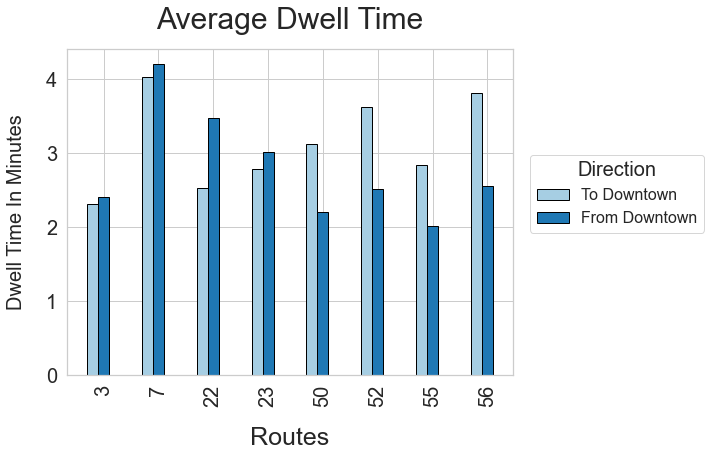

In [66]:
#create the base axis
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
fig, ax = plt.subplots(1,1, figsize = (8,6))
#set the labels
#and the x positions
label = to_downtown_dwell['ROUTE_ABBR']
x = np.arange(len(label))
#set the width of the bars
width = 0.2
#create the first bar -1 width
rect1 = ax.bar(x - width,
              to_downtown_dwell['DWELL_IN_MINS'],
              width = width, 
               label = 'To Downtown',
               edgecolor = "black")
#create the second bar using x
rect2 = ax.bar(x,
              from_downtown_dwell['DWELL_IN_MINS'],
              width = width,
              label = 'From Downtown',
              edgecolor = "black")
#create the third bar plus 1 width

#add the labels to the axis
ax.set_ylabel("Dwell Time In Minutes",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Routes",
             fontsize = 25,
             labelpad =20)
ax.set_title("Average Dwell Time",
            fontsize = 30,
            pad = 20)
#set the ticks
#using the labels
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
ax.legend(title = "Direction",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90,
              labelsize = 20)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 20)

In [60]:
 adherence_time = Headway_data.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['ADHERENCE'].mean()

In [48]:
 adherence_time =  adherence_time.reset_index()

In [49]:
from_downtown_adherence = adherence_time.loc[(adherence_time['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN')]
to_downtown_adherence = adherence_time.loc[(adherence_time['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')]

In [50]:
to_downtown_adherence

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,ADHERENCE
1,3,TO DOWNTOWN,-1.844487
3,7,TO DOWNTOWN,-1.349929
5,22,TO DOWNTOWN,-0.436211
7,23,TO DOWNTOWN,-0.823246
9,50,TO DOWNTOWN,-2.036681
11,52,TO DOWNTOWN,-1.863059
13,55,TO DOWNTOWN,-2.725444
15,56,TO DOWNTOWN,-1.122917


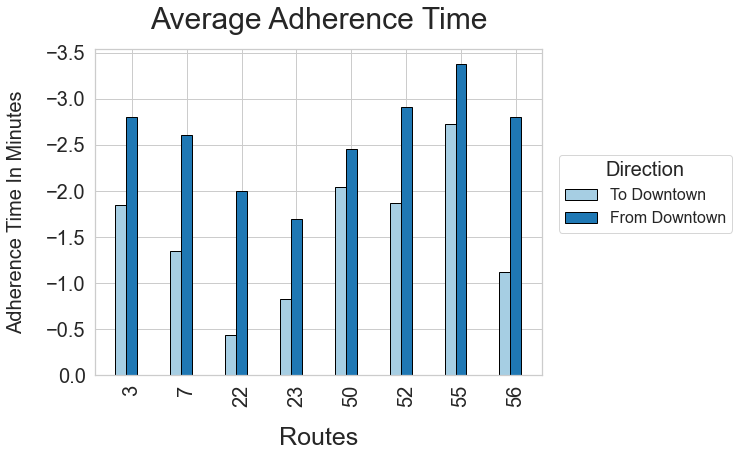

In [65]:
#create the base axis
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.color_palette('Paired')
fig, ax = plt.subplots(1,1, figsize = (8,6))
#set the labels
#and the x positions
label = to_downtown_adherence['ROUTE_ABBR']
x = np.arange(len(label))
#set the width of the bars
width = 0.2
#create the first bar -1 width
rect1 = ax.bar(x - width,
              to_downtown_adherence['ADHERENCE'],
              width = width, 
               label = 'To Downtown',
               edgecolor = "black")
#create the second bar using x
rect2 = ax.bar(x,
              from_downtown_adherence['ADHERENCE'],
              width = width,
              label = 'From Downtown',
              edgecolor = "black")
#create the third bar plus 1 width

#add the labels to the axis
ax.set_ylabel("Adherence Time In Minutes",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Routes",
             fontsize = 25,
             labelpad =20)
ax.set_title("Average Adherence Time",
            fontsize = 30,
            pad = 20)
#set the ticks
#using the labels
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
ax.legend(title = "Direction",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90,
              labelsize = 20)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 20)
plt.gca().invert_yaxis()

In [52]:
headway_perc_route = start_stop_trip.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])['headway_dev_perc'].mean()

In [53]:
headway_perc_route =  headway_perc_route.reset_index()

In [54]:
from_downtown_headway = headway_perc_route.loc[(headway_perc_route['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN')]
to_downtown_headway = headway_perc_route.loc[(headway_perc_route['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')]

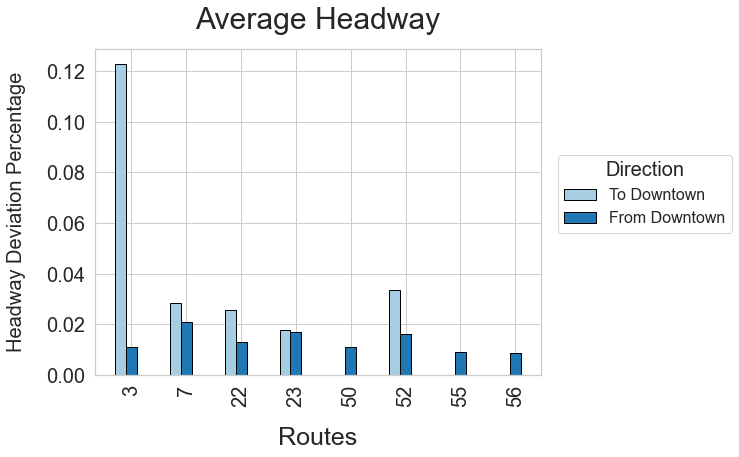

In [64]:
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
fig, ax = plt.subplots(1,1, figsize = (8,6))
#set the labels
#and the x positions
label = to_downtown_adherence['ROUTE_ABBR']
x = np.arange(len(label))
#set the width of the bars
width = 0.2
#create the first bar -1 width
rect1 = ax.bar(x - width,
              to_downtown_headway['headway_dev_perc'],
              width = width, 
               label = 'To Downtown',
               edgecolor = "black")
#create the second bar using x
rect2 = ax.bar(x,
              from_downtown_headway['headway_dev_perc'],
              width = width,
              label = 'From Downtown',
              edgecolor = "black")
#create the third bar plus 1 width

#add the labels to the axis
ax.set_ylabel("Headway Deviation Percentage",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Routes",
             fontsize = 25,
             labelpad =20)
ax.set_title("Average Headway",
            fontsize = 30,
            pad = 20)
#set the ticks
#using the labels
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
ax.legend(title = "Direction",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90,
              labelsize = 20)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 20)


TypeError: set_ticks() takes 2 positional arguments but 3 were given

<Figure size 2160x1080 with 0 Axes>

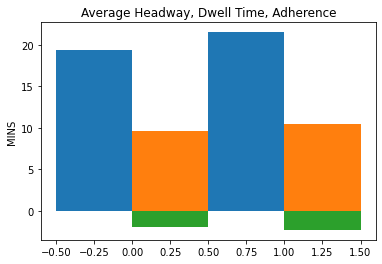

In [56]:
f = plt.figure(figsize=(30, 15))
labels = ['From', 'To']
AVG_ACTUAL_HDWY = [19.32, 21.51]
AVG_DWELL_IN_MINS = [9.62, 10.435]
AVG_ADHERENCE = [-1.99, -2.29]
x = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, AVG_ACTUAL_HDWY, width, label= 'AVG ACTUAL HDWY')
rects2 = ax.bar(x + width/2, AVG_DWELL_IN_MINS, width, label= 'AVG DWELL IN MINS')
rects3 = ax.bar(x + width/2, AVG_ADHERENCE, width, label= 'AVG DWELL IN MINS')
colors=np.random.rand(3)
ax.set_ylabel('MINS')
ax.set_title('Average Headway, Dwell Time, Adherence')
ax.set_xticks(x, labels)
ax.legend(
         fontsize = 14,
         bbox_to_anchor = (1.02, 0.7))
ax.bar_label(rects1, label_type='edge', color='black', padding=-2, fontsize=12)
ax.bar_label(rects2, label_type='edge', color ='black', fontsize= 12)
ax.bar_label(rects3, label_type='center', color ='black', fontsize=12)
plt.show();